In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/HousePricePrediction (2).csv')

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


In [28]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/HousePricePrediction (2).csv')


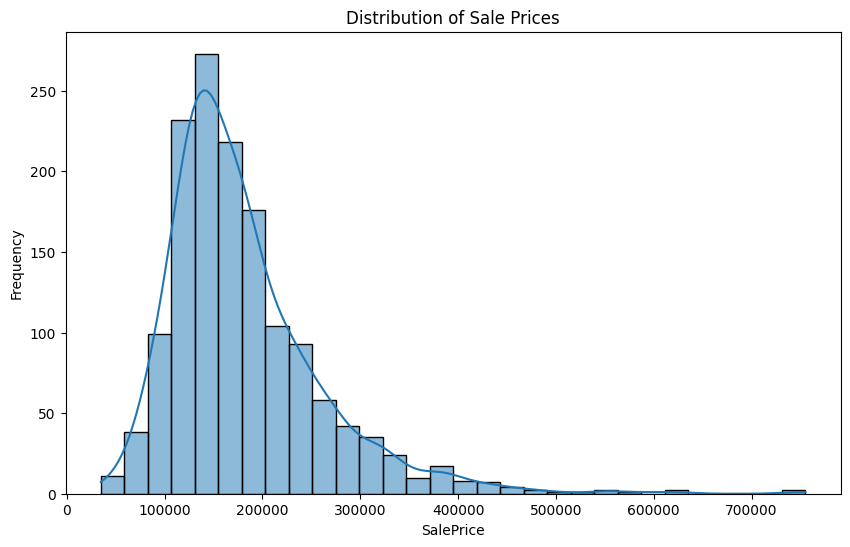

In [29]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()




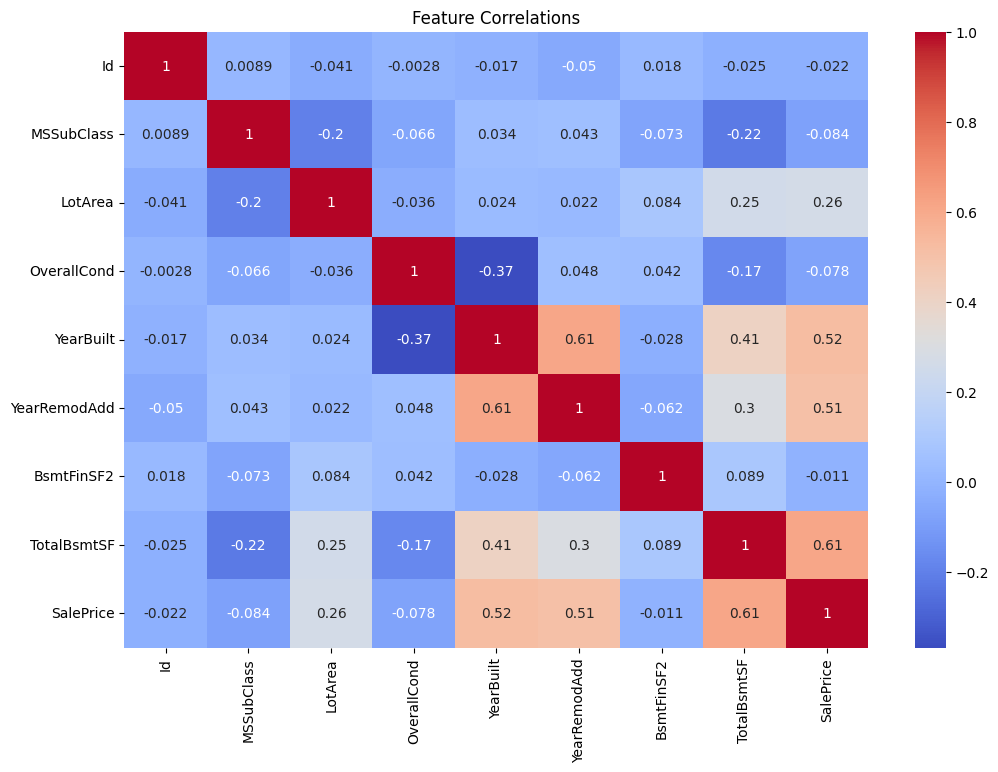

In [31]:
# Handle non-numeric columns before calculating correlations
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [32]:
# Feature Engineering: Adding new features based on domain knowledge
df['HouseAge'] = df['YearRemodAdd'] - df['YearBuilt']

# Handling missing values (if any) - basic imputation strategy
# Here, I'm using simple forward fill or mean imputation as an initial approach
df.fillna(method='ffill', inplace=True)

# Separating features and target variable
numeric_features = ['LotArea', 'OverallCond', 'TotalBsmtSF', 'HouseAge']
categorical_features = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

# Preprocessing pipeline: Standardization and OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define feature matrix X and target vector y
X = df.drop(columns=['Id', 'SalePrice', 'YearBuilt', 'YearRemodAdd'])
y = df['SalePrice']


<ipython-input-32-31e1002f3ebf>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [37]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Simplify param grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
}

# Updated Preprocessor with 'handle_unknown' set to 'ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Pipeline for Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Randomized search
rf_grid = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=-1, verbose=1, random_state=42)
rf_grid.fit(X_train, y_train)

# Best model evaluation
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Optimized Random Forest MSE: {rf_mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimized Random Forest MSE: 3067371873.651852


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Deep Learning Model using TensorFlow (Sequential API)
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
tf_model.compile(optimizer='adam', loss='mse')

# Model training with validation split
history = tf_model.fit(X_train_processed, y_train, epochs=50, validation_split=0.2, verbose=1)  # Use preprocessed data

# Evaluate TensorFlow model
tf_pred = tf_model.predict(X_test_processed)  # Use preprocessed data
tf_mse = mean_squared_error(y_test, tf_pred)
print(f"TensorFlow Neural Network MSE: {tf_mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 29321740288.0000 - val_loss: 29779392512.0000
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30356588544.0000 - val_loss: 29774757888.0000
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30547511296.0000 - val_loss: 29756493824.0000
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29035757568.0000 - val_loss: 29713954816.0000
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29588891648.0000 - val_loss: 29640245248.0000
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30846019584.0000 - val_loss: 29536567296.0000
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29818224640.0000 - val_loss: 29401071616.0000
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29899937792.0000 - val_loss: 29205848064.0000
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29999339520.0000 - val_loss: 28982595584.0000
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28800

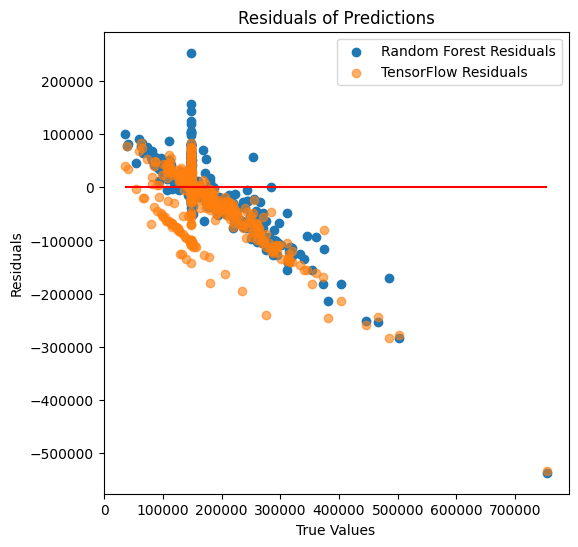

In [43]:
# Residuals Analysis: Comparing model performance
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred - y_test, label='Random Forest Residuals')
plt.scatter(y_test, tf_pred.flatten() - y_test, label='TensorFlow Residuals', alpha=0.6) # Flatten tf_pred to 1D
plt.hlines(0, min(y_test), max(y_test), colors='red')
plt.title('Residuals of Predictions')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()